In [5]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Monta o Google Drive
drive.mount('/content/drive')

# Caminho para a pasta "DNC" dentro do seu Google Drive
caminho_dnc = '/content/drive/My Drive/DNC - Barbara/DNC'

# Verifica se o caminho é válido
if os.path.exists(caminho_dnc):
    # Lista todas as pastas dentro da pasta "DNC"
    pastas_dnc = [nome for nome in os.listdir(caminho_dnc) if os.path.isdir(os.path.join(caminho_dnc, nome))]

    # Listas para armazenar DataFrames de vendas, feedback e acessos
    dfs_vendas = []
    dfs_feedback = []
    dfs_acessos = []

    # Itera sobre as pastas encontradas
    for pasta in pastas_dnc:
        # Caminho completo para cada pasta dentro de "DNC"
        caminho_pasta = os.path.join(caminho_dnc, pasta)

        # Lista todos os arquivos dentro da pasta atual
        arquivos_na_pasta = os.listdir(caminho_pasta)

        # Filtra os arquivos que são CSV
        arquivos_csv = [arquivo for arquivo in arquivos_na_pasta if arquivo.endswith('.csv')]

        # Adiciona os caminhos completos dos arquivos CSV à lista
        caminhos_csv = [os.path.join(caminho_pasta, csv) for csv in arquivos_csv]

        # Lê os arquivos CSV que contêm "vendas", "feedback" ou "acessos" e os adiciona às respectivas listas
        for caminho_csv in caminhos_csv:
            if 'vendas' in caminho_csv.lower():
                df_vendas = pd.read_csv(caminho_csv)  # Lê o arquivo CSV como DataFrame
                dfs_vendas.append(df_vendas)  # Adiciona o DataFrame de vendas à lista
            elif 'feedback' in caminho_csv.lower():
                df_feedback = pd.read_csv(caminho_csv)  # Lê o arquivo CSV como DataFrame
                dfs_feedback.append(df_feedback)  # Adiciona o DataFrame de feedback à lista
            elif 'acessos' in caminho_csv.lower():
                df_acessos = pd.read_csv(caminho_csv)  # Lê o arquivo CSV como DataFrame
                dfs_acessos.append(df_acessos)  # Adiciona o DataFrame de acessos à lista

    # Verifica se há DataFrames de vendas encontrados
    if dfs_vendas:
        # Concatena todos os DataFrames de vendas em um único DataFrame
        df_vendas_unificado = pd.concat(dfs_vendas, ignore_index=True)
        print("DataFrame de vendas unificado criado com sucesso.")
    else:
        print("Nenhum arquivo de vendas encontrado.")

    # Verifica se há DataFrames de feedback encontrados
    if dfs_feedback:
        # Concatena todos os DataFrames de feedback em um único DataFrame
        df_feedback_unificado = pd.concat(dfs_feedback, ignore_index=True)
        print("DataFrame de feedback unificado criado com sucesso.")
    else:
        print("Nenhum arquivo de feedback encontrado.")

    # Verifica se há DataFrames de acessos encontrados
    if dfs_acessos:
        # Concatena todos os DataFrames de acessos em um único DataFrame
        df_acessos_unificado = pd.concat(dfs_acessos, ignore_index=True)
        print("DataFrame de acessos unificado criado com sucesso.")
    else:
        print("Nenhum arquivo de acessos encontrado.")

else:
    print(f"O caminho '{caminho_dnc}' não existe.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame de vendas unificado criado com sucesso.
DataFrame de feedback unificado criado com sucesso.
DataFrame de acessos unificado criado com sucesso.


In [6]:
df_vendas_unificado.head()

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo
0,2024-01-29,33DC6810-238E-4370-808C-05D63D00DDA6,5E598502-1169-485C-99BE-AB9CB2B6EE20,1,2.0,599.8,0.00,599.80,440D767E-C2C6-4344-87E0-4FDC517401A9
1,2024-02-03,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,5,16.0,6304.0,1521.52,4782.48,440D767E-C2C6-4344-87E0-4FDC517401A9
2,2024-02-04,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,6,16.0,11318.0,1645.00,9673.00,440D767E-C2C6-4344-87E0-4FDC517401A9
3,2024-02-05,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,1,3.0,1616.0,80.80,1535.20,440D767E-C2C6-4344-87E0-4FDC517401A9
4,2024-02-06,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,4,15.0,6378.0,922.80,5455.20,440D767E-C2C6-4344-87E0-4FDC517401A9


In [7]:
print(df_vendas_unificado.dtypes)

Data             object
Funcionario      object
Unidade          object
N_Boletos         int64
N_Produtos      float64
Vlr_Bruto       float64
Vlr_Desconto    float64
Vlr_Liquido     float64
cli_codigo       object
dtype: object


In [8]:
#criando um indice
df_vendas_unificado['ID'] = range(1, len(df_vendas_unificado) + 1)
# Criando a coluna 'Devolucoes' com base na condição, incluindo em branco
df_vendas_unificado['Devolucoes'] = df_vendas_unificado.apply(lambda row: 'sim' if pd.isna(row['N_Produtos']) or row['N_Produtos'] <= 0 else 'nao', axis=1)


# Contagem de valores 'nao' e 'sim' na coluna 'Devolucoes'
contagem_devolucoes = df_vendas_unificado['Devolucoes'].value_counts()

print("Contagem de Devolucoes:")
print(contagem_devolucoes)

Contagem de Devolucoes:
Devolucoes
nao    2302233
sim      85839
Name: count, dtype: int64


In [9]:
#conferindo quantidade de clientes
numero_clientes = df_vendas_unificado['cli_codigo'].nunique()
print(f"Número de clientes únicos: {numero_clientes}")

# Contando valores negativos na coluna 'N_Produtos' por cli_codigo, incluindo NaN
contagem_negativos = df_vendas_unificado[df_vendas_unificado['N_Produtos'] <= 0].groupby('cli_codigo').size()


print("Contagem de valores negativos em N_Produtos por cli_codigo:")
print(contagem_negativos)


Número de clientes únicos: 52
Contagem de valores negativos em N_Produtos por cli_codigo:
cli_codigo
00D509DB-8BE0-4ACE-A5AD-5BF37386995B      373
27F0C275-12AC-452D-BD2D-FB2D6D6977CE     1778
2BB774CA-42B6-4958-AEAD-BE99DBE606CC      535
34F59AF1-257C-4CEA-BEB0-67911D3F179D     1760
3B4192CC-761D-45BA-A325-8D023FDC6D3A      950
440D767E-C2C6-4344-87E0-4FDC517401A9       36
485A81C2-65C2-4725-90A9-6AF52734DD23       32
487B7C30-6569-4857-8188-3DC4F2DC266D    18331
4903AA7A-ACE3-4C66-AD62-3FDBDD13CBF5     1176
4A74F755-039A-4777-834D-E9D7033E9142    24139
4C94CE12-1188-4B0C-9122-F2BDE5CB697A       38
4F8F5521-B308-4503-89B9-9482D8B24351      593
4FC32C34-7C03-4291-9325-6CA7055E7777      307
4FF291F2-92A7-49AF-A40E-EB76D8F18F58      240
54FAF654-1B94-4860-B113-9AE4CE8F1CFD      934
57CEF1EC-60F0-495B-9F34-32BA075CB39F      112
5F4387EC-6857-4E6E-94CC-C1CBE1E4F0B4      243
671E2F3D-BA62-46DD-BC74-001A3EF25825     1461
6F67F229-B819-4508-891F-4573DB8F3CB2      710
711E5097-06EA-4F3F-BF49-D

In [10]:
#arrumando data para tipo correto
df_vendas_unificado['Data'] = pd.to_datetime(df_vendas_unificado['Data'],format='%Y-%m-%d')

print(df_vendas_unificado.dtypes)

Data            datetime64[ns]
Funcionario             object
Unidade                 object
N_Boletos                int64
N_Produtos             float64
Vlr_Bruto              float64
Vlr_Desconto           float64
Vlr_Liquido            float64
cli_codigo              object
ID                       int64
Devolucoes              object
dtype: object


In [12]:
#conferindo faturamento Liquido de clientes
Faturamento_liquido = df_vendas_unificado['Vlr_Liquido'].sum()
print(f"Faturamento Liquido: {Faturamento_liquido:.2f}")

# Calculando o faturamento líquido excluindo devoluções
Faturamento_liquido_sem_devolucoes = df_vendas_unificado.loc[df_vendas_unificado['Devolucoes'] == 'nao', 'Vlr_Liquido'].sum()
print(f"Faturamento Liquido sem devolucoes: {Faturamento_liquido_sem_devolucoes:.2f}")



Faturamento Liquido: 8037169176.86
Faturamento Liquido sem devolucoes: 8093761116.49


In [13]:
#conferindo faturamento Bruto de clientes
Faturamento_bruto = df_vendas_unificado['Vlr_Bruto'].sum()
print(f"Faturamento Bruto: {Faturamento_bruto:.2f}")

# Calculando o faturamento Bruto excluindo devoluções
Faturamento_bruto_sem_devolucoes = df_vendas_unificado.loc[df_vendas_unificado['Devolucoes'] == 'nao', 'Vlr_Bruto'].sum()
print(f"Faturamento Bruto sem devolucoes: {Faturamento_bruto_sem_devolucoes:.2f}")


Faturamento Bruto: 9511798135.43
Faturamento Bruto sem devolucoes: 9531727642.36


In [14]:
#Quantidade de vendas excluindo devolucoes
num_vendas =  df_vendas_unificado.loc[df_vendas_unificado['Devolucoes'] == 'nao', 'ID'].nunique()
print(f'Quantidade de Vendas {num_vendas}')

Quantidade de Vendas 2302233


In [15]:
#conferindo ticket médio sem devolucoes

ticket_medio = Faturamento_liquido_sem_devolucoes/num_vendas

print(f'R${ticket_medio:.2f}')


R$3515.61


In [16]:
#conferindo Itens por venda

Total_itens_vendidos = df_vendas_unificado.loc[df_vendas_unificado['Devolucoes'] == 'nao', 'N_Produtos'].sum()
Itens_por_venda = Total_itens_vendidos/num_vendas

print(f'Quantidade de Itens por venda:{Itens_por_venda:.2f}')

Quantidade de Itens por venda:471.89


In [17]:
 df_feedback_unificado.head()

,Processo,Data,Funcionario_Avaliado,Funcionario_Avaliador,Item,Resposta,CLI_CODIGO
0,Reunião Mensal Desempenho Loja,2024-05-09 18:58:50.847,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Seu desempenho venda x meta está acima do míni...,0.00,440D767E-C2C6-4344-87E0-4FDC517401A9
1,Reunião Mensal Desempenho Loja,2024-05-09 18:58:50.847,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Plano de Ação da Semana. Escolha no máximo 3 p...,Nosso Plano de Ação: 9/5/24\n* Reunião Semanal...,440D767E-C2C6-4344-87E0-4FDC517401A9
2,Reunião Mensal Desempenho Loja,2024-05-09 18:58:50.847,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Seu desempenho de Óculos Completo está dentro ...,0.00,440D767E-C2C6-4344-87E0-4FDC517401A9
3,Reunião Mensal Desempenho Loja,2024-05-09 18:58:50.847,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Quais atitudes e resultados desta semana te de...,Organização da loja\nExposição dos produtos\nA...,440D767E-C2C6-4344-87E0-4FDC517401A9
4,Reunião Mensal Desempenho Loja,2024-05-09 18:58:50.847,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,O que você poderia ter feito melhor em atitude...,"Mais teatro de venda, agenda Leonardo, Estudo ...",440D767E-C2C6-4344-87E0-4FDC517401A9


In [18]:
print(df_feedback_unificado.dtypes)

Processo                 object
Data                     object
Funcionario_Avaliado     object
Funcionario_Avaliador    object
Item                     object
Resposta                 object
CLI_CODIGO               object
dtype: object


In [19]:
# Convertendo a coluna 'Data' para tipo datetime
df_feedback_unificado['Data'] = pd.to_datetime(df_feedback_unificado['Data'])

# Criando uma nova coluna 'Hora' com o horário extraído da coluna 'Data'
df_feedback_unificado['Hora'] = df_feedback_unificado['Data'].dt.time

# Criando uma nova coluna 'Data' com apenas a data (sem a hora)
df_feedback_unificado['Data'] = df_feedback_unificado['Data'].dt.date

# Convertendo a coluna 'Data' para tipo datetime
df_feedback_unificado['Data'] = pd.to_datetime(df_feedback_unificado['Data'])

In [20]:
df_feedback_unificado.head()
print(df_feedback_unificado['CLI_CODIGO'].count())



41437


In [21]:
print(df_feedback_unificado.dtypes)

Processo                         object
Data                     datetime64[ns]
Funcionario_Avaliado             object
Funcionario_Avaliador            object
Item                             object
Resposta                         object
CLI_CODIGO                       object
Hora                             object
dtype: object


In [22]:
# Preenchendo valores ausentes na coluna 'Resposta'
df_feedback_unificado['Resposta'].fillna('', inplace=True)

# Função para limpar a coluna 'Resposta'
def clean_response(response):
    if isinstance(response, str):
        response = response.replace('\n', ' ').replace('!', '').replace('!!', '')
        return response.strip()
    else:
        return ''

# Aplicando a limpeza na coluna resposta
df_feedback_unificado['Resposta'] = df_feedback_unificado['Resposta'].apply(clean_response)

# Função para verificar se um valor é numérico
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Certifique-se de que o léxico do Vader está baixado
nltk.download('vader_lexicon')

# Inicializa o analisador de sentimentos do NLTK Vader
sid = SentimentIntensityAnalyzer()


# Lista de palavras-chave
positive_keywords = [
    'excelente', 'parabens', 'parabéns', 'muito bom', 'ótimo', 'otimo', 'fantastico', 'fantástico', 'maravilhoso', 'perfeito', 'adorei', 'gostei', 'excepcional', 'incrivel', 'incrível', 'sensacional', 'excelente trabalho', 'muito satisfeito', 'consegui reverter', 'um bom', 'proativo', 'proativa' # Corrigido aqui
]
negative_keywords = [
    'precisa melhorar','sair da empresa' 'preciso melhorar', 'preiso me', 'reverter a venda', 'melhorar', 'mas', 'ruim', 'abaixo', 'pessimo', 'péssimo', 'terrivel', 'terrível', 'horrível', 'horrivel', 'não gostei', 'detestei', 'insatisfatório', 'insatisfatorio', 'decepcionante', 'fraco', 'pessima qualidade', 'péssima qualidade', 'problema', 'dificuldade', 'insatisfação', 'inadequado'
]

# Função para analisar o sentimento baseado no valor e no texto
def analyze_sentiment(resposta):
    if is_numeric(resposta):
        valor = float(resposta)
        if valor >= 3:
            return 'Feedback Positivo'
        else:
            return 'Feedback Negativo'
    else:
        resposta_lower = resposta.lower()

        # Verificar palavras-chave para feedback positivo e negativo
        if any(kw in resposta_lower for kw in positive_keywords):
            return 'Feedback Positivo'
        if any(kw in resposta_lower for kw in negative_keywords):
            return 'Feedback Negativo'

        # Usar Vader para análise de sentimento
        vader_sentiment = sid.polarity_scores(resposta)
        if vader_sentiment['compound'] >= 0.05:
            return 'Feedback Positivo'
        elif vader_sentiment['compound'] <= -0.05:  # Corrigido aqui
            return 'Feedback Negativo'

# Aplicar a análise de sentimento
df_feedback_unificado['Sentimento'] = df_feedback_unificado['Resposta'].apply(analyze_sentiment)

# Verificar
df_feedback_unificado.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Processo,Data,Funcionario_Avaliado,Funcionario_Avaliador,Item,Resposta,CLI_CODIGO,Hora,Sentimento
0,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Seu desempenho venda x meta está acima do míni...,0.00,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,Feedback Negativo
1,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Plano de Ação da Semana. Escolha no máximo 3 p...,Nosso Plano de Ação: 9/5/24 * Reunião Semanal ...,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,None
2,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Seu desempenho de Óculos Completo está dentro ...,0.00,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,Feedback Negativo
3,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Quais atitudes e resultados desta semana te de...,Organização da loja Exposição dos produtos Apr...,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,None
4,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,O que você poderia ter feito melhor em atitude...,"Mais teatro de venda, agenda Leonardo, Estudo ...",440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,None


In [23]:

# Verificar quais valores únicos existem na coluna 'Sentimento'
valores_unicos_sentimento = df_feedback_unificado['Sentimento'].unique()
print("Valores únicos na coluna 'Sentimento':", valores_unicos_sentimento)

# Filtrar as linhas onde 'Sentimento' é igual a 'None' ou é nulo
filt_none_sentimento = (df_feedback_unificado['Sentimento'] == 'None') | (df_feedback_unificado['Sentimento'].isnull())

# Selecionar apenas as colunas 'Resposta' e 'Sentimento' onde o filtro é True
resultados = df_feedback_unificado.loc[filt_none_sentimento, ['Resposta', 'Sentimento']]

# Exibir os resultados
print(resultados)


Valores únicos na coluna 'Sentimento': ['Feedback Negativo' None 'Feedback Positivo']
                                                Resposta Sentimento
1      Nosso Plano de Ação: 9/5/24 * Reunião Semanal ...       None
3      Organização da loja Exposição dos produtos Apr...       None
4      Mais teatro de venda, agenda Leonardo, Estudo ...       None
17     Vendendo combos de lente sempre oferecendo do ...       None
20     Vender lentes graduadas Fazer vendar agregada ...       None
...                                                  ...        ...
41432                                         detalhismo       None
41433                              empatia/sociabilidade       None
41434                                                          None
41435  Vamos trabalhar a empatia com a equipe 1º uma ...       None
41436                                     perfil técnico       None

[27071 rows x 2 columns]


In [24]:
df_acessos_unificado.head()

,Data,Funcionario,Unidade,Quantidade_de_Acessos,CLI_CODIGO
0,2024-02-16,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,3,440D767E-C2C6-4344-87E0-4FDC517401A9
1,2024-02-23,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,3,440D767E-C2C6-4344-87E0-4FDC517401A9
2,2024-02-26,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,5,440D767E-C2C6-4344-87E0-4FDC517401A9
3,2024-02-27,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,2,440D767E-C2C6-4344-87E0-4FDC517401A9
4,2024-02-28,2F209544-5573-450E-833D-0715B1F286E9,A4526B53-AA2B-42D5-B5DF-FAC0C390C288,2,440D767E-C2C6-4344-87E0-4FDC517401A9


In [25]:
print(df_acessos_unificado.dtypes)
df_acessos_unificado['Quantidade_de_Acessos'] = df_acessos_unificado['Quantidade_de_Acessos'].astype(float)
print(df_acessos_unificado.dtypes)

Data                     object
Funcionario              object
Unidade                  object
Quantidade_de_Acessos    object
CLI_CODIGO               object
dtype: object
Data                      object
Funcionario               object
Unidade                   object
Quantidade_de_Acessos    float64
CLI_CODIGO                object
dtype: object


In [26]:
# Criando df_vendas_reduzido com a contagem de itens por cli_codigo e Data
df_vendas_reduzido = df_vendas_unificado.groupby(['cli_codigo', 'Data']).agg({'ID': 'count'}).reset_index()
df_vendas_reduzido = df_vendas_reduzido.rename(columns={'ID': 'Quantidade de Itens'})

In [27]:
df_vendas_reduzido.head()

,cli_codigo,Data,Quantidade de Itens
0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-01,1
1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-02,1
2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-03,1
3,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-04,6
4,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-05,9


In [28]:
df_vendas_reduzido['Quantidade de Itens'].sum()

2388072

In [29]:
df_acessos_unificado = df_acessos_unificado.rename(columns={'CLI_CODIGO': 'cli_codigo'})

In [30]:
# Criando df_acessos_reduzido com a contagem de itens por cli_codigo e Data
df_acessos_reduzido = df_acessos_unificado.groupby(['cli_codigo', 'Data']).agg({'Quantidade_de_Acessos': 'sum'}).reset_index()
df_acessos_reduzido = df_acessos_reduzido.rename(columns={'Quantidade_de_Acessos': 'Quantidade_de_Acessos'})

In [31]:
df_acessos_reduzido['Data'] = pd.to_datetime(df_acessos_reduzido['Data'])

In [32]:
df_acessos_reduzido.head()


,cli_codigo,Data,Quantidade_de_Acessos
0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-01,4.0
1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-02,3.0
2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-03,2.0
3,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-04,7.0
4,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-05,20.0


In [33]:
print(df_acessos_reduzido.dtypes)



cli_codigo                       object
Data                     datetime64[ns]
Quantidade_de_Acessos           float64
dtype: object


In [34]:
# Unir os DataFrames com base em 'cli_codigo' e 'Data'
df_merge = pd.merge(df_vendas_reduzido, df_acessos_reduzido, on=['cli_codigo', 'Data'], how='outer')

In [ ]:
print(df_merge.head())

                             cli_codigo       Data  Quantidade de Itens  \
0  00D509DB-8BE0-4ACE-A5AD-5BF37386995B 2021-01-01                  1.0   
1  00D509DB-8BE0-4ACE-A5AD-5BF37386995B 2021-01-02                  1.0   
2  00D509DB-8BE0-4ACE-A5AD-5BF37386995B 2021-01-03                  1.0   
3  00D509DB-8BE0-4ACE-A5AD-5BF37386995B 2021-01-04                  6.0   
4  00D509DB-8BE0-4ACE-A5AD-5BF37386995B 2021-01-05                  9.0   

   Quantidade_de_Acessos  
0                    4.0  
1                    3.0  
2                    2.0  
3                    7.0  
4                   20.0  


In [35]:
print(df_merge.dtypes)

cli_codigo                       object
Data                     datetime64[ns]
Quantidade de Itens             float64
Quantidade_de_Acessos           float64
dtype: object


In [36]:
# Calculando a soma da coluna Quantidade_de_Acessos
soma_acessos = df_merge['Quantidade_de_Acessos'].sum()

print(f"Soma da Quantidade_de_Acessos: {soma_acessos}")

Soma da Quantidade_de_Acessos: 8395972.0


In [37]:
print(df_merge.dtypes)

cli_codigo                       object
Data                     datetime64[ns]
Quantidade de Itens             float64
Quantidade_de_Acessos           float64
dtype: object


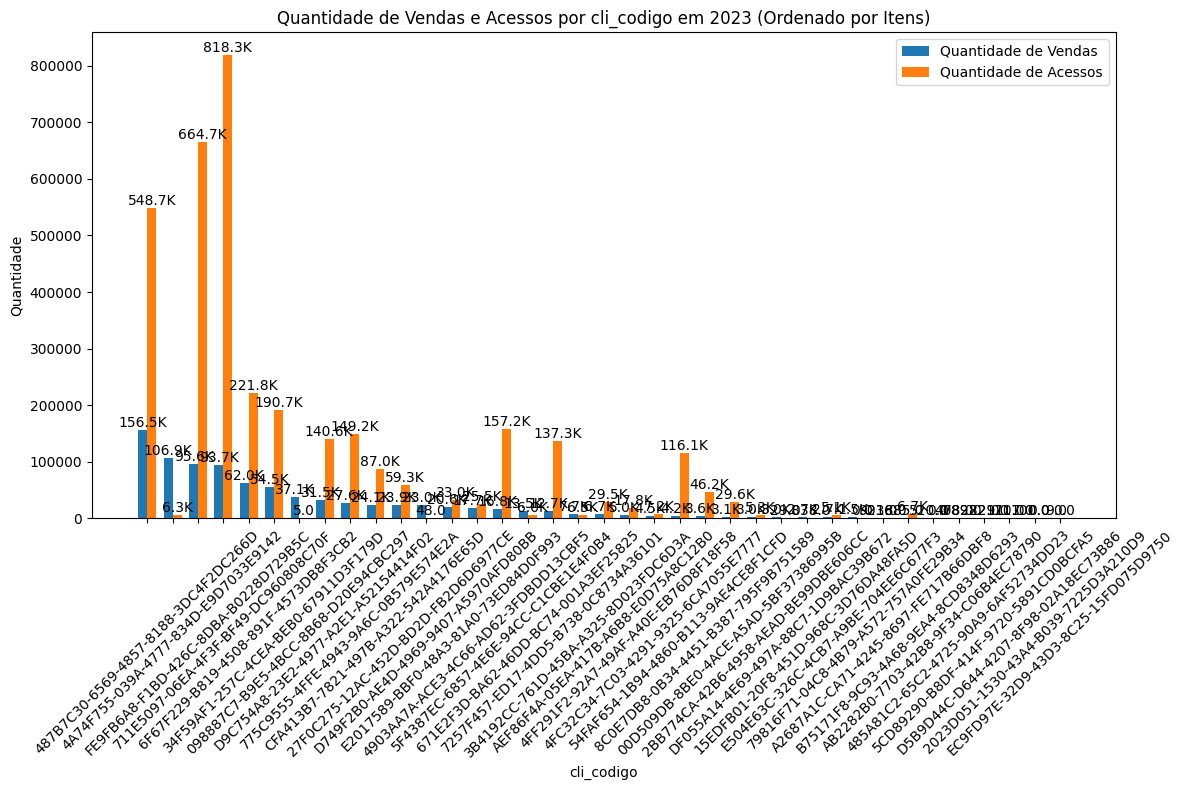

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Filtros direto na criação do gráfico
df_grouped = df_merge[df_merge['Data'].dt.year == 2023].groupby('cli_codigo').agg({
    'Quantidade de Itens': 'sum',
    'Quantidade_de_Acessos': 'sum'
}).reset_index()

# Ordenando por Quantidade de Itens de forma decrescente
df_grouped = df_grouped.sort_values(by='Quantidade de Itens', ascending=False)

# Preparando dados para o gráfico
cli_codigos = df_grouped['cli_codigo']
quantidade_itens = df_grouped['Quantidade de Itens']
quantidade_acessos = df_grouped['Quantidade_de_Acessos']

# Configurações para o gráfico
bar_width = 0.35
index = np.arange(len(cli_codigos))

# Função para formatar os números
def formatar_numero(valor):
    if valor >= 1000:
        return f'{valor/1000:.1f}K'
    else:
        return str(valor)

# Aplicando a formatação aos valores
quantidade_itens_formatado = [formatar_numero(valor) for valor in quantidade_itens]
quantidade_acessos_formatado = [formatar_numero(valor) for valor in quantidade_acessos]

# Criando o gráfico de colunas clusterizado
plt.figure(figsize=(12, 8))
bar1 = plt.bar(index, quantidade_itens, bar_width, label='Quantidade de Vendas')
bar2 = plt.bar(index + bar_width, quantidade_acessos, bar_width, label='Quantidade de Acessos')

plt.title('Quantidade de Vendas e Acessos por cli_codigo em 2023 (Ordenado por Itens)')
plt.xlabel('cli_codigo')
plt.ylabel('Quantidade')
plt.xticks(index + bar_width / 2, cli_codigos, rotation=45)
plt.legend()

# Aplicando rótulos em cima das barras
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, formatar_numero(height),
             ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [39]:
df_feedback_unificado.head()
# Criando a coluna Qtd_feedback_respondido

# Verifica se o valor é NaN e se não é uma string vazia ou um traço ('-')
def verifica_resposta(resposta):
    if pd.isna(resposta) or len(str(resposta)) == 0 or resposta == '-':
        return 0
    else:
        return 1

# Aplica a função lambda na coluna 'Resposta'
df_feedback_unificado['Qtd_feedback_respondido'] = df_feedback_unificado['Resposta'].apply(verifica_resposta)

# Exibe as primeiras linhas para verificar o resultado
print(df_feedback_unificado.head())


                         Processo       Data  \
0  Reunião Mensal Desempenho Loja 2024-05-09   
1  Reunião Mensal Desempenho Loja 2024-05-09   
2  Reunião Mensal Desempenho Loja 2024-05-09   
3  Reunião Mensal Desempenho Loja 2024-05-09   
4  Reunião Mensal Desempenho Loja 2024-05-09   

                   Funcionario_Avaliado                 Funcionario_Avaliador  \
0  478DFD8F-2D38-46A0-B005-E63A9ACD26A0  FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2   
1  478DFD8F-2D38-46A0-B005-E63A9ACD26A0  FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2   
2  478DFD8F-2D38-46A0-B005-E63A9ACD26A0  FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2   
3  478DFD8F-2D38-46A0-B005-E63A9ACD26A0  FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2   
4  478DFD8F-2D38-46A0-B005-E63A9ACD26A0  FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2   

                                                Item  \
0  Seu desempenho venda x meta está acima do míni...   
1  Plano de Ação da Semana. Escolha no máximo 3 p...   
2  Seu desempenho de Óculos Completo está dentro ...   


In [40]:
df_feedback_unificado.head()

,Processo,Data,Funcionario_Avaliado,Funcionario_Avaliador,Item,Resposta,CLI_CODIGO,Hora,Sentimento,Qtd_feedback_respondido
0,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Seu desempenho venda x meta está acima do míni...,0.00,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,Feedback Negativo,1
1,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Plano de Ação da Semana. Escolha no máximo 3 p...,Nosso Plano de Ação: 9/5/24 * Reunião Semanal ...,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,None,1
2,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Seu desempenho de Óculos Completo está dentro ...,0.00,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,Feedback Negativo,1
3,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,Quais atitudes e resultados desta semana te de...,Organização da loja Exposição dos produtos Apr...,440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,None,1
4,Reunião Mensal Desempenho Loja,2024-05-09,478DFD8F-2D38-46A0-B005-E63A9ACD26A0,FAFC314A-4AFE-4AA8-BEAD-FF936B7F22C2,O que você poderia ter feito melhor em atitude...,"Mais teatro de venda, agenda Leonardo, Estudo ...",440D767E-C2C6-4344-87E0-4FDC517401A9,18:58:50.847000,None,1


In [41]:
# Criando df_feedback_reduzido com a contagem de itens por cli_codigo e Data
df_feedback_unificado.rename(columns={'CLI_CODIGO': 'cli_codigo'}, inplace=True)
df_feedback_reduzido = df_feedback_unificado.groupby(['cli_codigo', 'Data']).agg({'Qtd_feedback_respondido': 'sum'}).reset_index()
df_feedback_reduzido.head()

,cli_codigo,Data,Qtd_feedback_respondido
0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-04-24,12
1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2022-02-18,4
2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2022-07-13,42
3,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2022-08-03,36
4,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2023-01-21,6


In [42]:
# Unir os DataFrames com base em 'cli_codigo' e 'Data'
df_merge_feedback_vendas = pd.merge(df_vendas_reduzido, df_feedback_reduzido, on=['cli_codigo', 'Data'], how='outer')
df_merge_feedback_vendas.head()

,cli_codigo,Data,Quantidade de Itens,Qtd_feedback_respondido
0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-01,1.0,NaN
1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-02,1.0,NaN
2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-03,1.0,NaN
3,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-04,6.0,NaN
4,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,2021-01-05,9.0,NaN


In [43]:
# Converter a coluna 'Data' para tipo datetime se necessário
df_merge_feedback_vendas['Data'] = pd.to_datetime(df_merge_feedback_vendas['Data'])

# Agrupar por 'cli_codigo' e calcular a soma das colunas relevantes
grouped = df_merge_feedback_vendas.groupby('cli_codigo').agg({
    'Quantidade de Itens': 'sum',
    'Qtd_feedback_respondido': 'sum'
}).reset_index()

# Calcular o total geral
total_geral = {
    'Total Quantidade de Itens': grouped['Quantidade de Itens'].sum(),
    'Total Qtd_feedback_respondido': grouped['Qtd_feedback_respondido'].sum()
}

print("Total Geral:")
print(total_geral)

Total Geral:
{'Total Quantidade de Itens': 2388072.0, 'Total Qtd_feedback_respondido': 37189.0}


In [44]:
print(df_merge_feedback_vendas.dtypes)

cli_codigo                         object
Data                       datetime64[ns]
Quantidade de Itens               float64
Qtd_feedback_respondido           float64
dtype: object


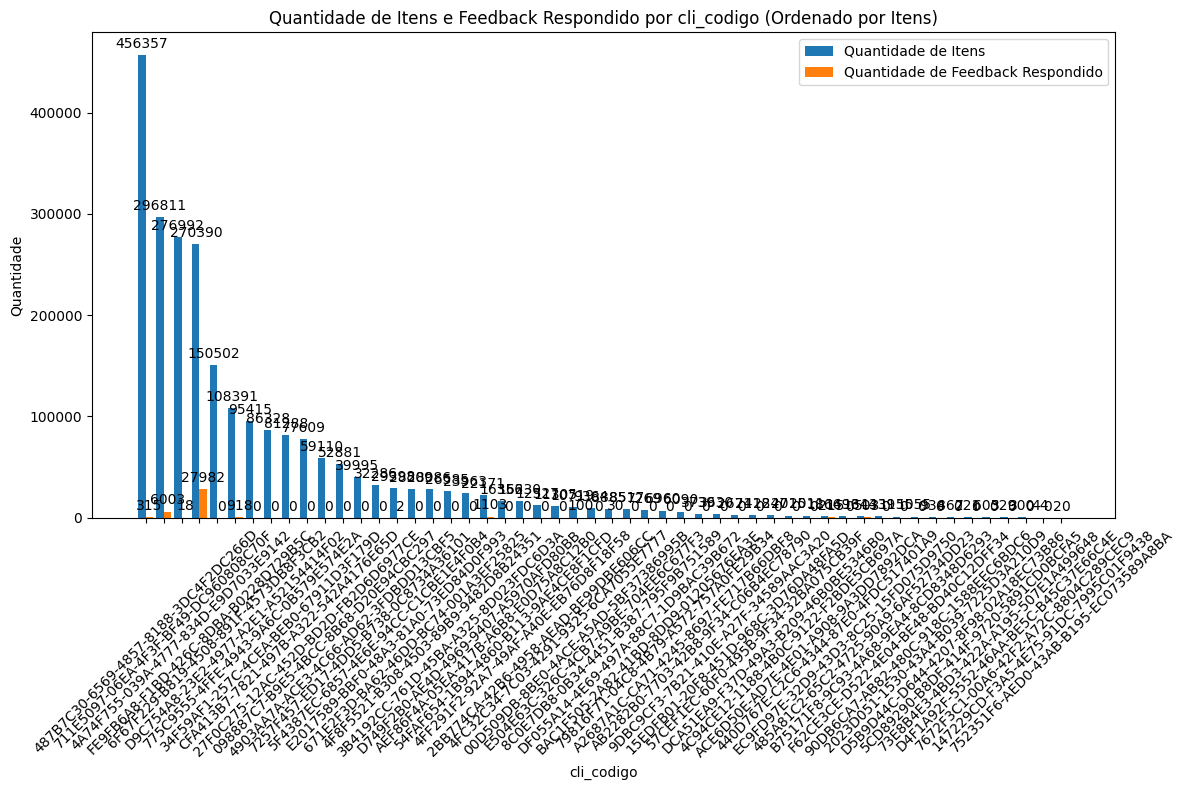

In [45]:
# Agrupando por cli_codigo e calculando a soma das colunas Quantidade de Itens e Qtd_feedback_respondido
df_grouped_feedback = df_merge_feedback_vendas.groupby('cli_codigo').agg({
    'Quantidade de Itens': 'sum',
    'Qtd_feedback_respondido': 'sum'
}).reset_index()

# Ordenando por Quantidade de Itens de forma decrescente
df_grouped_feedback = df_grouped_feedback.sort_values(by='Quantidade de Itens', ascending=False)

# Preparando dados para o gráfico
cli_codigos_feedback = df_grouped_feedback['cli_codigo']
quantidade_itens_feedback = df_grouped_feedback['Quantidade de Itens']
quantidade_feedback_respondido = df_grouped_feedback['Qtd_feedback_respondido']

# Configurações para o gráfico
bar_width = 0.40
space_between_bars = 2
index = np.arange(len(cli_codigos_feedback))

# Criando o gráfico de colunas clusterizado
plt.figure(figsize=(12, 8))
bar1 = plt.bar(index, quantidade_itens_feedback, bar_width, label='Quantidade de Itens')
bar2 = plt.bar(index + bar_width, quantidade_feedback_respondido, bar_width, label='Quantidade de Feedback Respondido')

plt.title('Quantidade de Itens e Feedback Respondido por cli_codigo (Ordenado por Itens)')
plt.xlabel('cli_codigo')
plt.ylabel('Quantidade')
plt.xticks(index + bar_width / 2, cli_codigos_feedback, rotation=45)
plt.legend()

# Aplicando rótulos em cima das barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.tight_layout()

# Exibindo o gráfico
plt.show()

